1. 
Regressão linear simples
Variáveis dependentes: Gols feitos, gols tomados, ano, posição, time e  jogos. 
Variáveis independentes: Vitórias, derrotas, empates, vitórias nos pênaltis, derrotas nos pênaltis, porcentagem vitória e derrota. 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
base_nhl = pd.read_csv('https://github.com/luanasekitani/base_nhl/raw/main/nhlplayoffs.csv')
base_nhl

,rank,team,year,games,wins,losses,ties,shootout_wins,shootout_losses,win_loss_percentage,goals_scored,goals_against,goal_differential
0,1,Colorado Avalanche,2022,20,16,4,0,5,1,0.800,85,55,30
1,2,Tampa Bay Lightning,2022,23,14,9,0,1,2,0.609,67,61,6
2,3,New York Rangers,2022,20,10,10,0,1,2,0.500,62,58,4
3,4,Edmonton Oilers,2022,16,8,8,0,1,2,0.500,65,59,6
4,5,Carolina Hurricanes,2022,14,7,7,0,1,0,0.500,37,40,-3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,2,Toronto St. Patricks,1921,2,0,2,0,0,0,0.000,0,7,-7
1005,1,Montreal Canadiens,1919,5,4,1,0,0,0,0.800,26,18,8
1006,2,Ottawa Senators,1919,5,1,4,0,0,0,0.200,18,26,-8
1007,1,Montreal Canadiens,1918,2,1,1,0,0,0,0.500,7,10,-3


In [ ]:
base_nhl = base_nhl.rename(columns={'rank':'Posicao','team':'Time','year':'Ano','games':'Jogos','wins':'Vitorias','losses':'Derrotas','ties':'Empates','shootout_wins':'Vitoria_Penaltis','shootout_losses':'Derrota_Penaltis','win_loss_percentage':'Pct_Vitoria_Derrota','goals_scored':'Gols_Feitos','goals_against':'Gols_Levados','goal_differential':'Diferenca_Gols'})

In [ ]:
base_nhl

,Posicao,Time,Ano,Jogos,Vitorias,Derrotas,Empates,Vitoria_Penaltis,Derrota_Penaltis,Pct_Vitoria_Derrota,Gols_Feitos,Gols_Levados,Diferenca_Gols
0,1,Colorado Avalanche,2022,20,16,4,0,5,1,0.800,85,55,30
1,2,Tampa Bay Lightning,2022,23,14,9,0,1,2,0.609,67,61,6
2,3,New York Rangers,2022,20,10,10,0,1,2,0.500,62,58,4
3,4,Edmonton Oilers,2022,16,8,8,0,1,2,0.500,65,59,6
4,5,Carolina Hurricanes,2022,14,7,7,0,1,0,0.500,37,40,-3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,2,Toronto St. Patricks,1921,2,0,2,0,0,0,0.000,0,7,-7
1005,1,Montreal Canadiens,1919,5,4,1,0,0,0,0.800,26,18,8
1006,2,Ottawa Senators,1919,5,1,4,0,0,0,0.200,18,26,-8
1007,1,Montreal Canadiens,1918,2,1,1,0,0,0,0.500,7,10,-3


In [ ]:
base_nhl.isnull().sum()

Posicao                0
Time                   0
Ano                    0
Jogos                  0
Vitorias               0
Derrotas               0
Empates                0
Vitoria_Penaltis       0
Derrota_Penaltis       0
Pct_Vitoria_Derrota    0
Gols_Feitos            0
Gols_Levados           0
Diferenca_Gols         0
dtype: int64

In [ ]:
base_nhl.Time.value_counts()

Montreal Canadiens         85
Boston Bruins              75
Toronto Maple Leafs        67
Detroit Red Wings          62
New York Rangers           61
St. Louis Blues            45
Chicago Black Hawks        41
Philadelphia Flyers        40
Pittsburgh Penguins        37
Washington Capitals        32
Los Angeles Kings          31
Buffalo Sabres             29
Vancouver Canucks          28
New York Islanders         27
Ottawa Senators            25
Calgary Flames             25
Edmonton Oilers            24
New Jersey Devils          22
Chicago Blackhawks         22
San Jose Sharks            21
Colorado Avalanche         18
Minnesota North Stars      17
Dallas Stars               17
Winnipeg Jets              16
Nashville Predators        15
Tampa Bay Lightning        14
Minnesota Wild             12
Montreal Maroons           11
Anaheim Ducks              10
Carolina Hurricanes         9
Quebec Nordiques            9
Phoenix Coyotes             8
Florida Panthers            8
Hartford W

In [ ]:
base_nhl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Posicao              1009 non-null   int64  
 1   Time                 1009 non-null   object 
 2   Ano                  1009 non-null   int64  
 3   Jogos                1009 non-null   int64  
 4   Vitorias             1009 non-null   int64  
 5   Derrotas             1009 non-null   int64  
 6   Empates              1009 non-null   int64  
 7   Vitoria_Penaltis     1009 non-null   int64  
 8   Derrota_Penaltis     1009 non-null   int64  
 9   Pct_Vitoria_Derrota  1009 non-null   float64
 10  Gols_Feitos          1009 non-null   int64  
 11  Gols_Levados         1009 non-null   int64  
 12  Diferenca_Gols       1009 non-null   int64  
dtypes: float64(1), int64(11), object(1)
memory usage: 102.6+ KB


In [ ]:
tab_freq = base_nhl.Time.value_counts().head(20)
tab_freq

Montreal Canadiens     85
Boston Bruins          75
Toronto Maple Leafs    67
Detroit Red Wings      62
New York Rangers       61
St. Louis Blues        45
Chicago Black Hawks    41
Philadelphia Flyers    40
Pittsburgh Penguins    37
Washington Capitals    32
Los Angeles Kings      31
Buffalo Sabres         29
Vancouver Canucks      28
New York Islanders     27
Ottawa Senators        25
Calgary Flames         25
Edmonton Oilers        24
New Jersey Devils      22
Chicago Blackhawks     22
San Jose Sharks        21
Name: Time, dtype: int64

<Axes: >

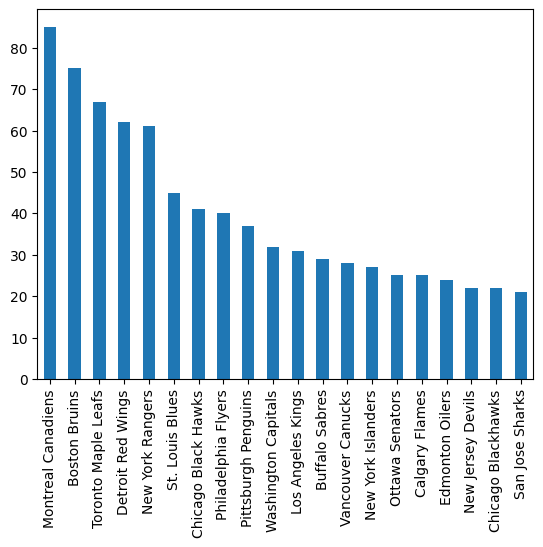

In [ ]:
tab_freq.plot.bar()

De acordo com esse gráfico, podemos observar que o time Montreal Canadiens foi o time que mais teve aparições nos playoffs desde 1918 e logo em seguida os times Boston Bruins e Toronto Maple Leafs.


<Axes: >

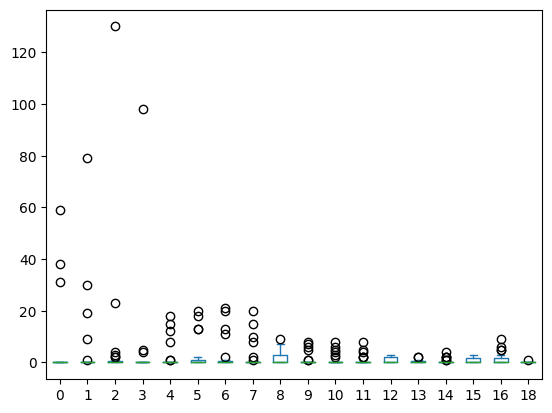

In [ ]:
tab_cruzada = pd.crosstab(base_nhl.Jogos,base_nhl.Vitorias,margins=False)
tab_cruzada.plot.box()

De acordo com esse gráfico boxplot podemos afirmar que New York Rangers apresenta maior variabilidade em jogos e vitórias do que outros times.

<Axes: ylabel='Frequency'>

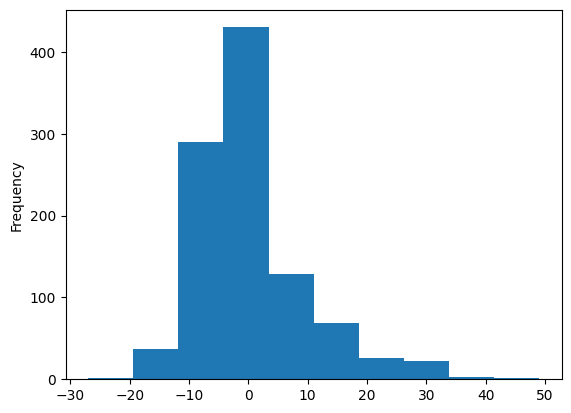

In [ ]:
base_nhl['Diferenca_Gols'].plot.hist()

De acordo com este histograma podemos afirmar que há uma alta variancia na diferença de gols de cada time. 


In [ ]:
freq_situação = base_nhl['Vitorias'].value_counts()

<Axes: ylabel='Vitorias'>

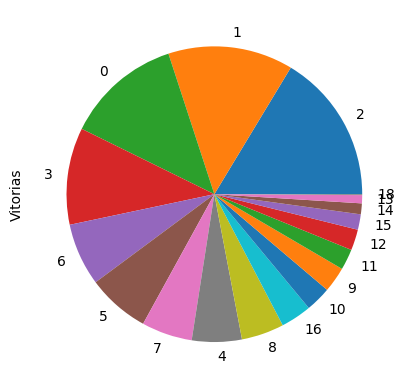

In [ ]:
freq_situação = base_nhl.Vitorias.value_counts()
freq_situação.plot.pie()

De acordo com o gráfico podemos analisar a quantidade de vitórias que os times tiveram nos playoof desde 1918.

<ipython-input-14-eec23832c431>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(base_nhl.corr())


<Axes: >

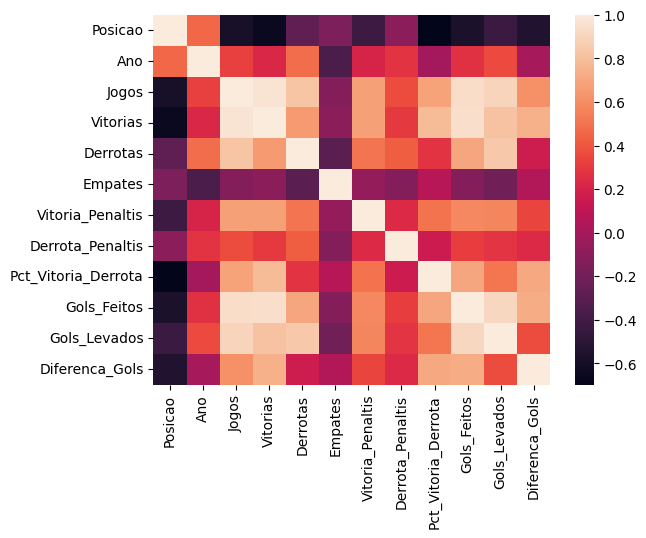

In [ ]:
sns.heatmap(base_nhl.corr())

**Correlação entre Jogos e Vitorias**


In [ ]:
Vit_jogos = base_nhl[ ['Jogos','Vitorias'] ]
print(Vit_jogos)

      Jogos  Vitorias
0        20        16
1        23        14
2        20        10
3        16         8
4        14         7
...     ...       ...
1004      2         0
1005      5         4
1006      5         1
1007      2         1
1008      2         1

[1009 rows x 2 columns]


In [ ]:
Vit_jogos.corr()

,Jogos,Vitorias
Jogos,1.000000,0.966591
Vitorias,0.966591,1.000000


Correlação entre as variaveis alta e positiva

In [ ]:
#separando entre treino =x e alvo=y
X = Vit_jogos.iloc[:, 0].values
y = Vit_jogos.iloc[:, 1].values

In [ ]:
#treinando modelo
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X.reshape(-1, 1), y.reshape(-1, 1))

LinearRegression()

In [ ]:
intercept = regressor.intercept_
print(intercept)

[-2.05801615]


In [ ]:
coef = regressor.coef_
print(coef)

[[0.71713996]]


In [ ]:
def prever_vitorias(n):
  prever_vitorias = intercept + n * coef
  return prever_vitorias

In [ ]:
predictions = regressor.predict(X.reshape(-1, 1))
predictions

array([[12.28478295],
       [14.43620282],
       [12.28478295],
       ...,
       [ 1.52768363],
       [-0.62373624],
       [-0.62373624]])

In [ ]:
#prevendo quantidades de vitorias de acordo com a quantidade de jogos
print(prever_vitorias(50))
print(prever_vitorias(55))
print(prever_vitorias(60))
print(prever_vitorias(65))
print(prever_vitorias(70))

[[33.7989816]]
[[37.38468138]]
[[40.97038115]]
[[44.55608093]]
[[48.14178071]]


In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
r2 = r2_score(y.reshape(-1, 1), predictions)
mse = mean_squared_error(y.reshape(-1, 1), predictions)
print("R2: ", r2)
print("MSE: ", mse)

R2:  0.9342973096658964
MSE:  1.2116482412825245


In [ ]:
import statsmodels.api as sm



#add constant to predictor variables
X = sm.add_constant(X.reshape(-1, 1))

#fit linear regression model
model = sm.OLS(y.reshape(-1, 1), X).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                 1.432e+04
Date:                Thu, 18 May 2023   Prob (F-statistic):               0.00
Time:                        13:21:57   Log-Likelihood:                -1528.6
No. Observations:                1009   AIC:                             3061.
Df Residuals:                    1007   BIC:                             3071.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0580      0.066    -31.196      0.0

**Métricas de Qualidade**


In [ ]:
mae = mean_absolute_error(y.reshape(-1, 1), predictions)
print("MAE: ", mae)

MAE:  0.759743509911546


 Quanto menor o valor da média das diferenças absolutas entre o valor predito pelo modelo e o valor real observado (MAE), melhor é o desempenho do modelo. Nesse caso, o valor do MAE foi de 0,7597, indicando que o modelo tem uma boa precisão.

In [ ]:
print("R2: ", r2)

R2:  0.9342973096658964


O coeficiente R2 indica o quão bem o modelo se ajusta aos dados. Quanto mais próximo de 1, melhor é o ajuste do modelo. Nesse caso, o valor de R2 foi de 0.93, o que significa que o modelo explica 93% da variância nos dados, deixando 7% da variância sem explicação pelo modelo.

In [ ]:
print("MSE: ", mse)

MSE:  1.2116482412825245


a média dos erros quadrados, mede a diferença entre o valor predito pelo modelo e o valor real observado. Quanto menor o valor do MSE, melhor é o desempenho do modelo. Nesse caso, o valor do MSE foi de 1.2116, o que indica que o modelo tem uma boa precisão considerando o tamanho da base de dados.